In [2]:
import glob
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import shapely
import matplotlib.colors as colors
from IPython.display import clear_output
from tqdm.notebook import tqdm
import time
from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\rmpjazz\AppData\Local\Temp\ipykernel_79032\1679906244.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [6]:
cell_geo = pd.read_pickle("./dataframes/cell_geometry")
cell = geopandas.GeoDataFrame(cell_geo, columns=['geometry'], 
                                 crs='epsg:4326')

jsonfile = ('./ark28722-s73w23-geojson.json')
world = geopandas.read_file(jsonfile)
world = world.dissolve()


dataframe_name = "./dataframes/2000-2019/ordinary_kriging_gaussian_geographic_nlags_10_values_log"

dataframe = pd.read_pickle(dataframe_name)
cell["interpolated_value"] = dataframe.copy()

In [7]:
####### PLOTTING
import matplotlib.colors as colors

def plotter(dataset):
    cell["interpolated_value"] = dataset
    cell["interpolated_value"] = cell["interpolated_value"].replace(np.nan, 0)
    ax = cell.plot(column='interpolated_value', figsize=(10, 10), cmap='plasma', legend=True, vmin = -6, vmax = 11)
    world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (8,8), linewidth=1.2)
    return ax
def log_plotter(dataset):
    cell["interpolated_value"] = dataset
    cell["interpolated_value"] = cell["interpolated_value"].replace(np.nan, 1)
    ax = cell.plot(column='interpolated_value', figsize=(10, 10), cmap='plasma', norm=colors.SymLogNorm(vmin=cell["interpolated_value"].min(), vmax=cell["interpolated_value"].max(), linthresh = 0.02), legend=True)
    world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (8,8), linewidth=1.2)
def free_plotter(dataset):
    cell["interpolated_value"] = dataset
    cell["interpolated_value"] = cell["interpolated_value"].replace(np.nan, 0)
    ax = cell.plot(column='interpolated_value', figsize=(10, 10), cmap='plasma', legend=True)
    world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (8,8), linewidth=1.2)
    return ax

In [83]:
cell["interpolated_value"].replace(np.nan, 0)

421837      0.000000
420317      0.000000
418797      0.000000
418037      0.000000
419557      0.000000
             ...    
215769    540.319827
212729    385.367903
218809      0.000000
237049      0.000000
225649      0.000000
Name: interpolated_value, Length: 200569, dtype: float64

<IPython.core.display.Javascript object>


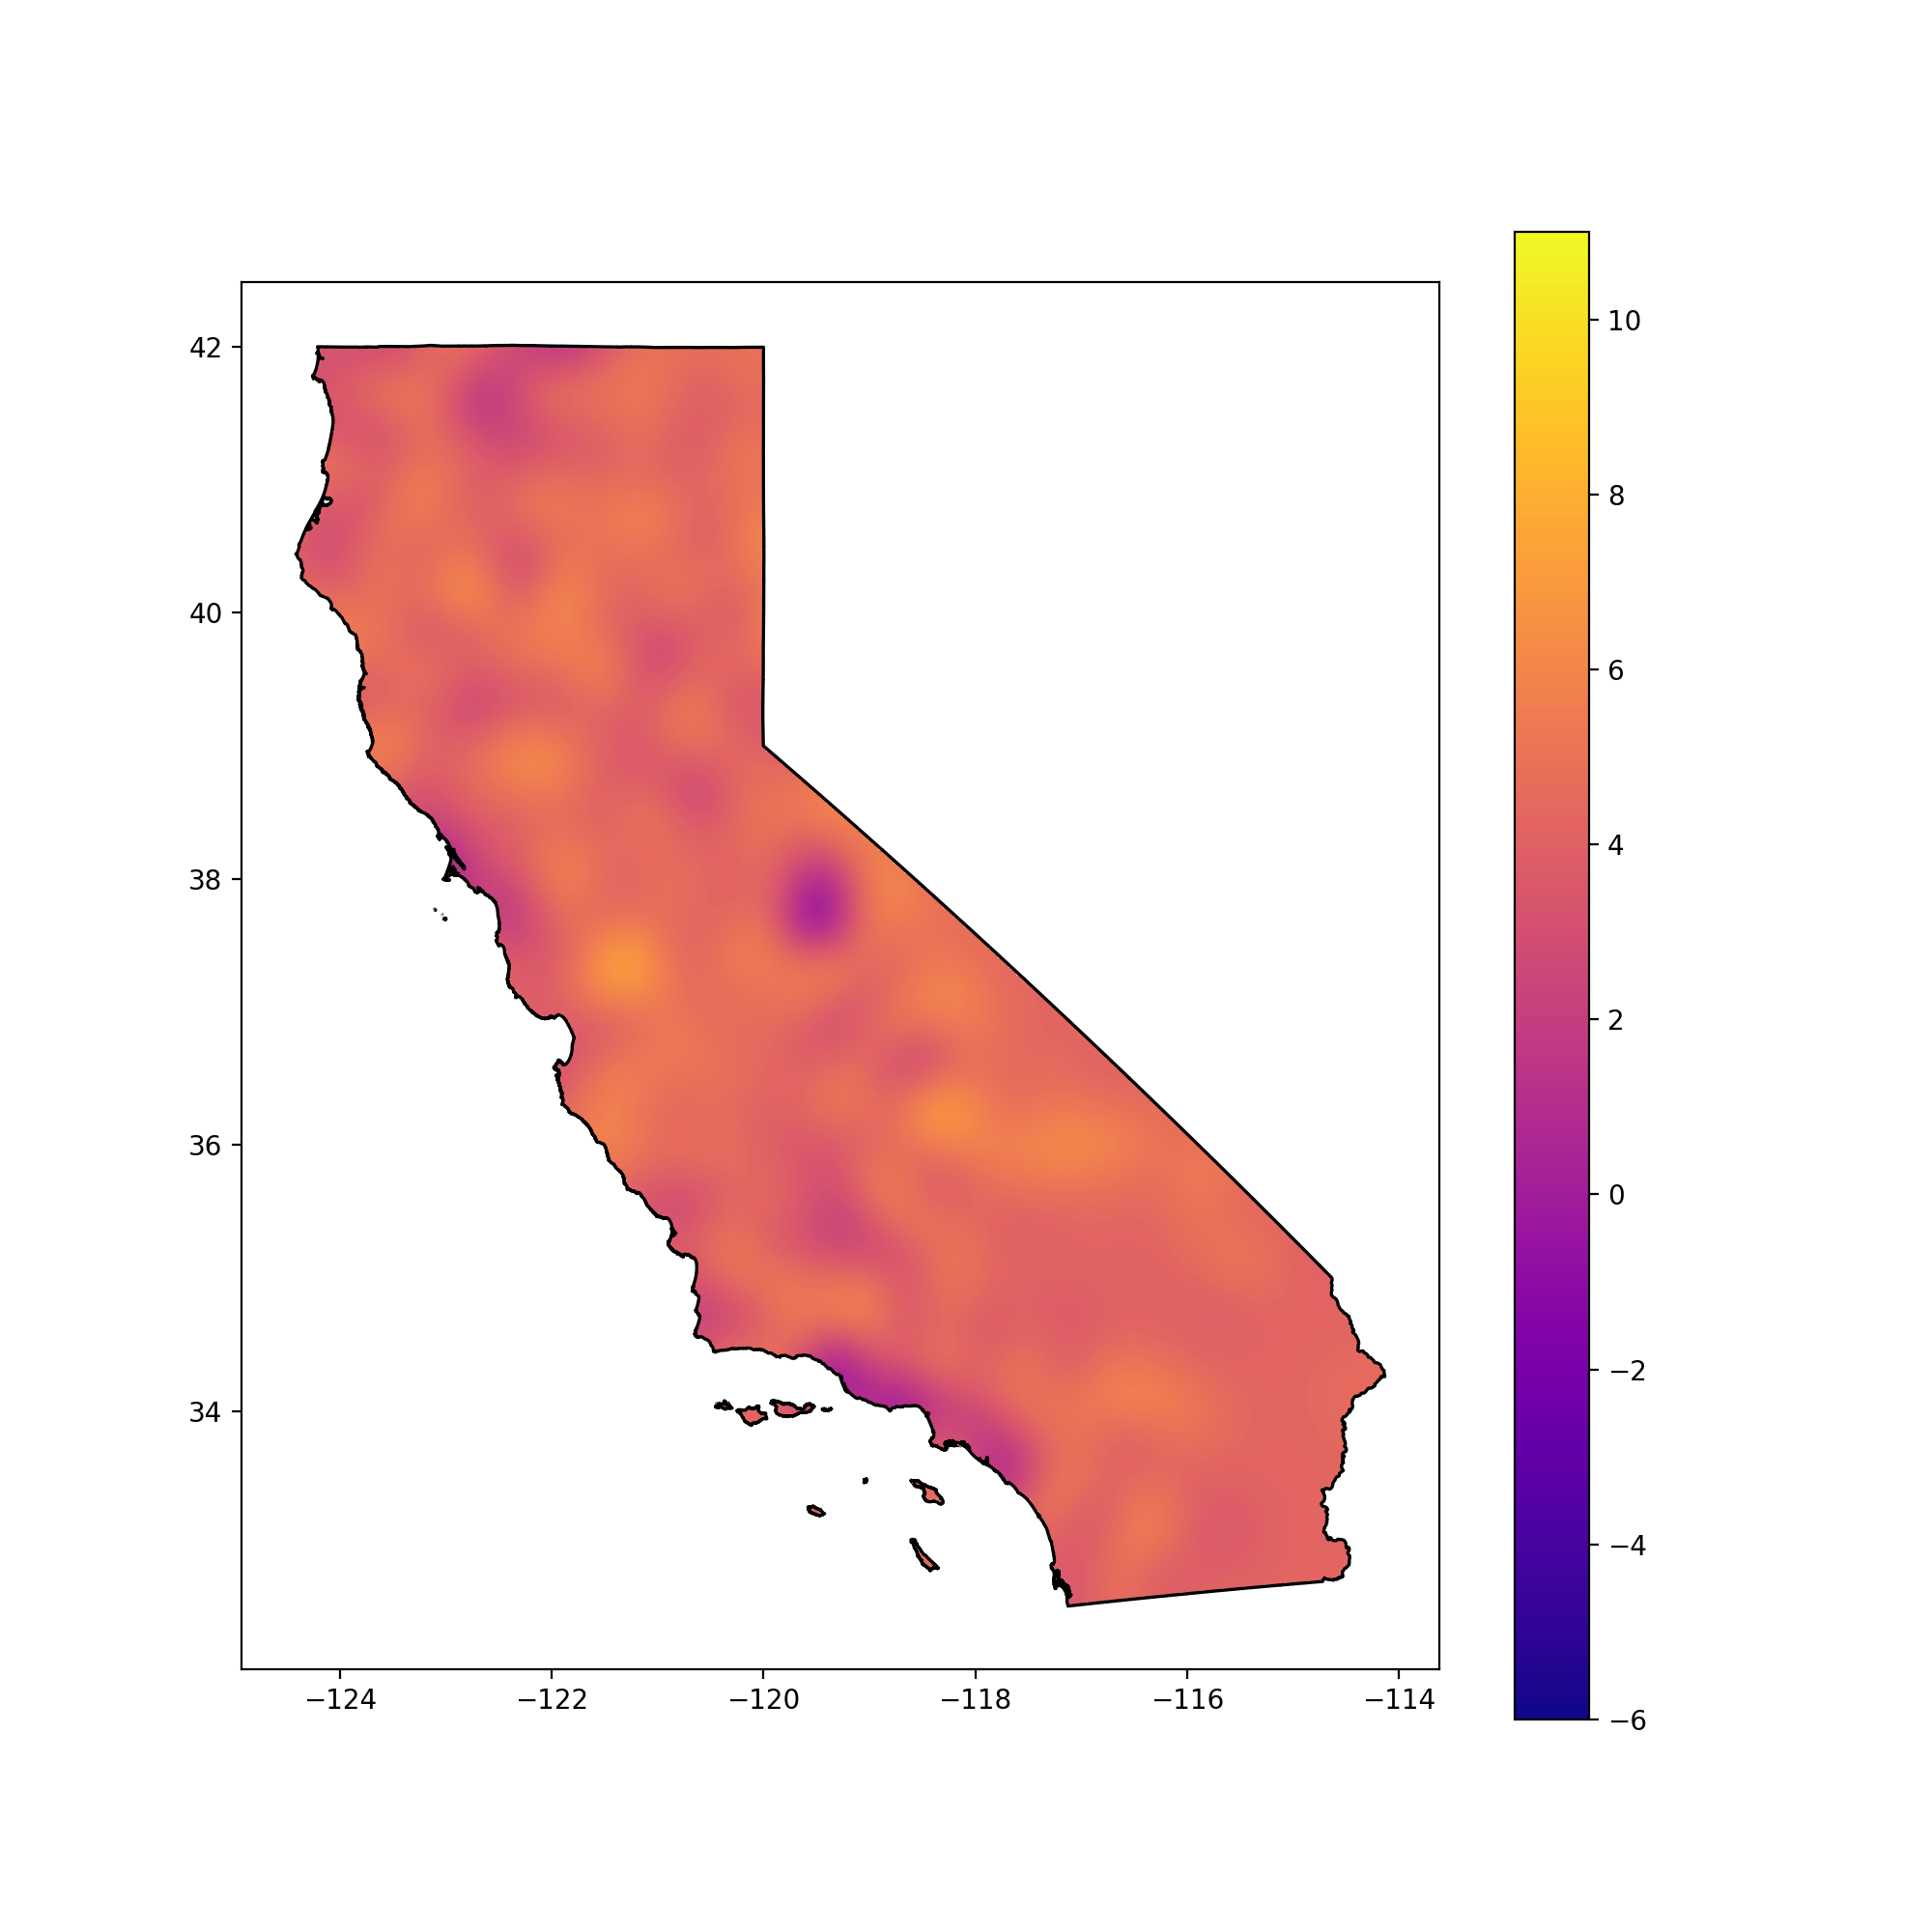

<Axes: >

In [90]:
%matplotlib notebook
dataframe_name = "./dataframes/2000-2019/ordinary_kriging_gaussian_geographic_nlags_10_values"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)

<IPython.core.display.Javascript object>


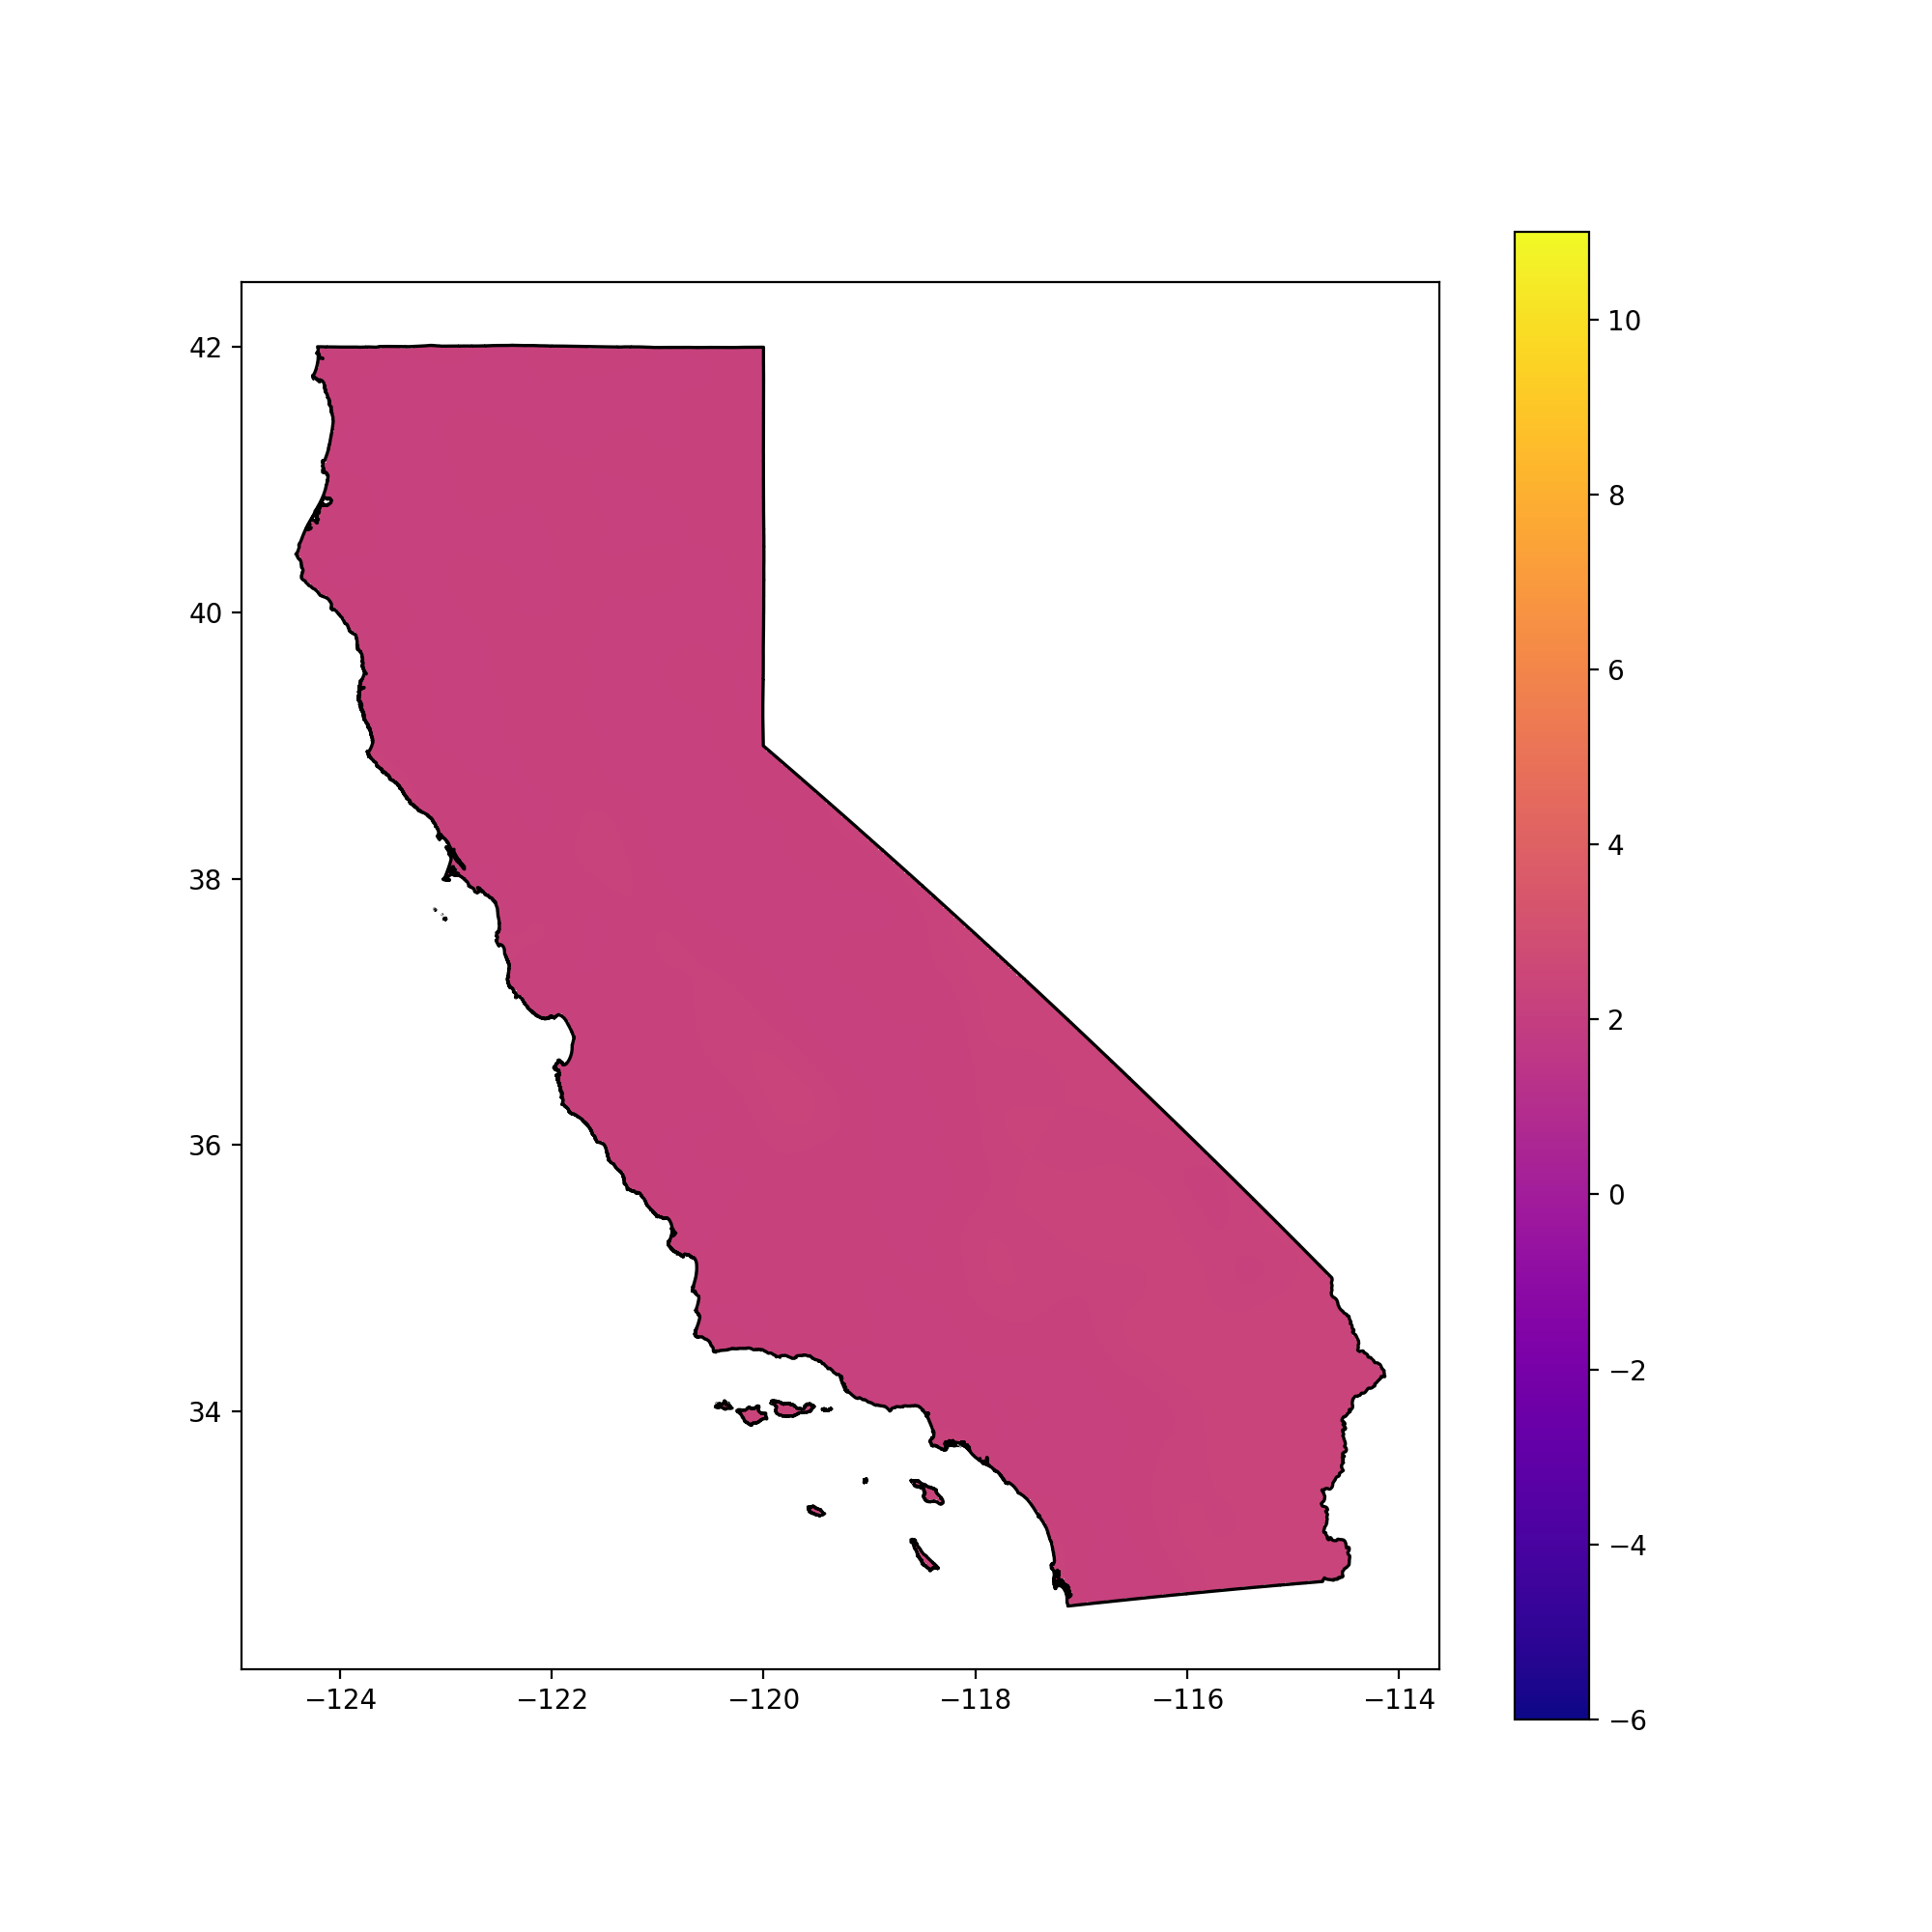

<Axes: >

In [92]:
dataframe_name = "./dataframes/2000-2019/ordinary_kriging_gaussian_geographic_nlags_10_std"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)

<IPython.core.display.Javascript object>


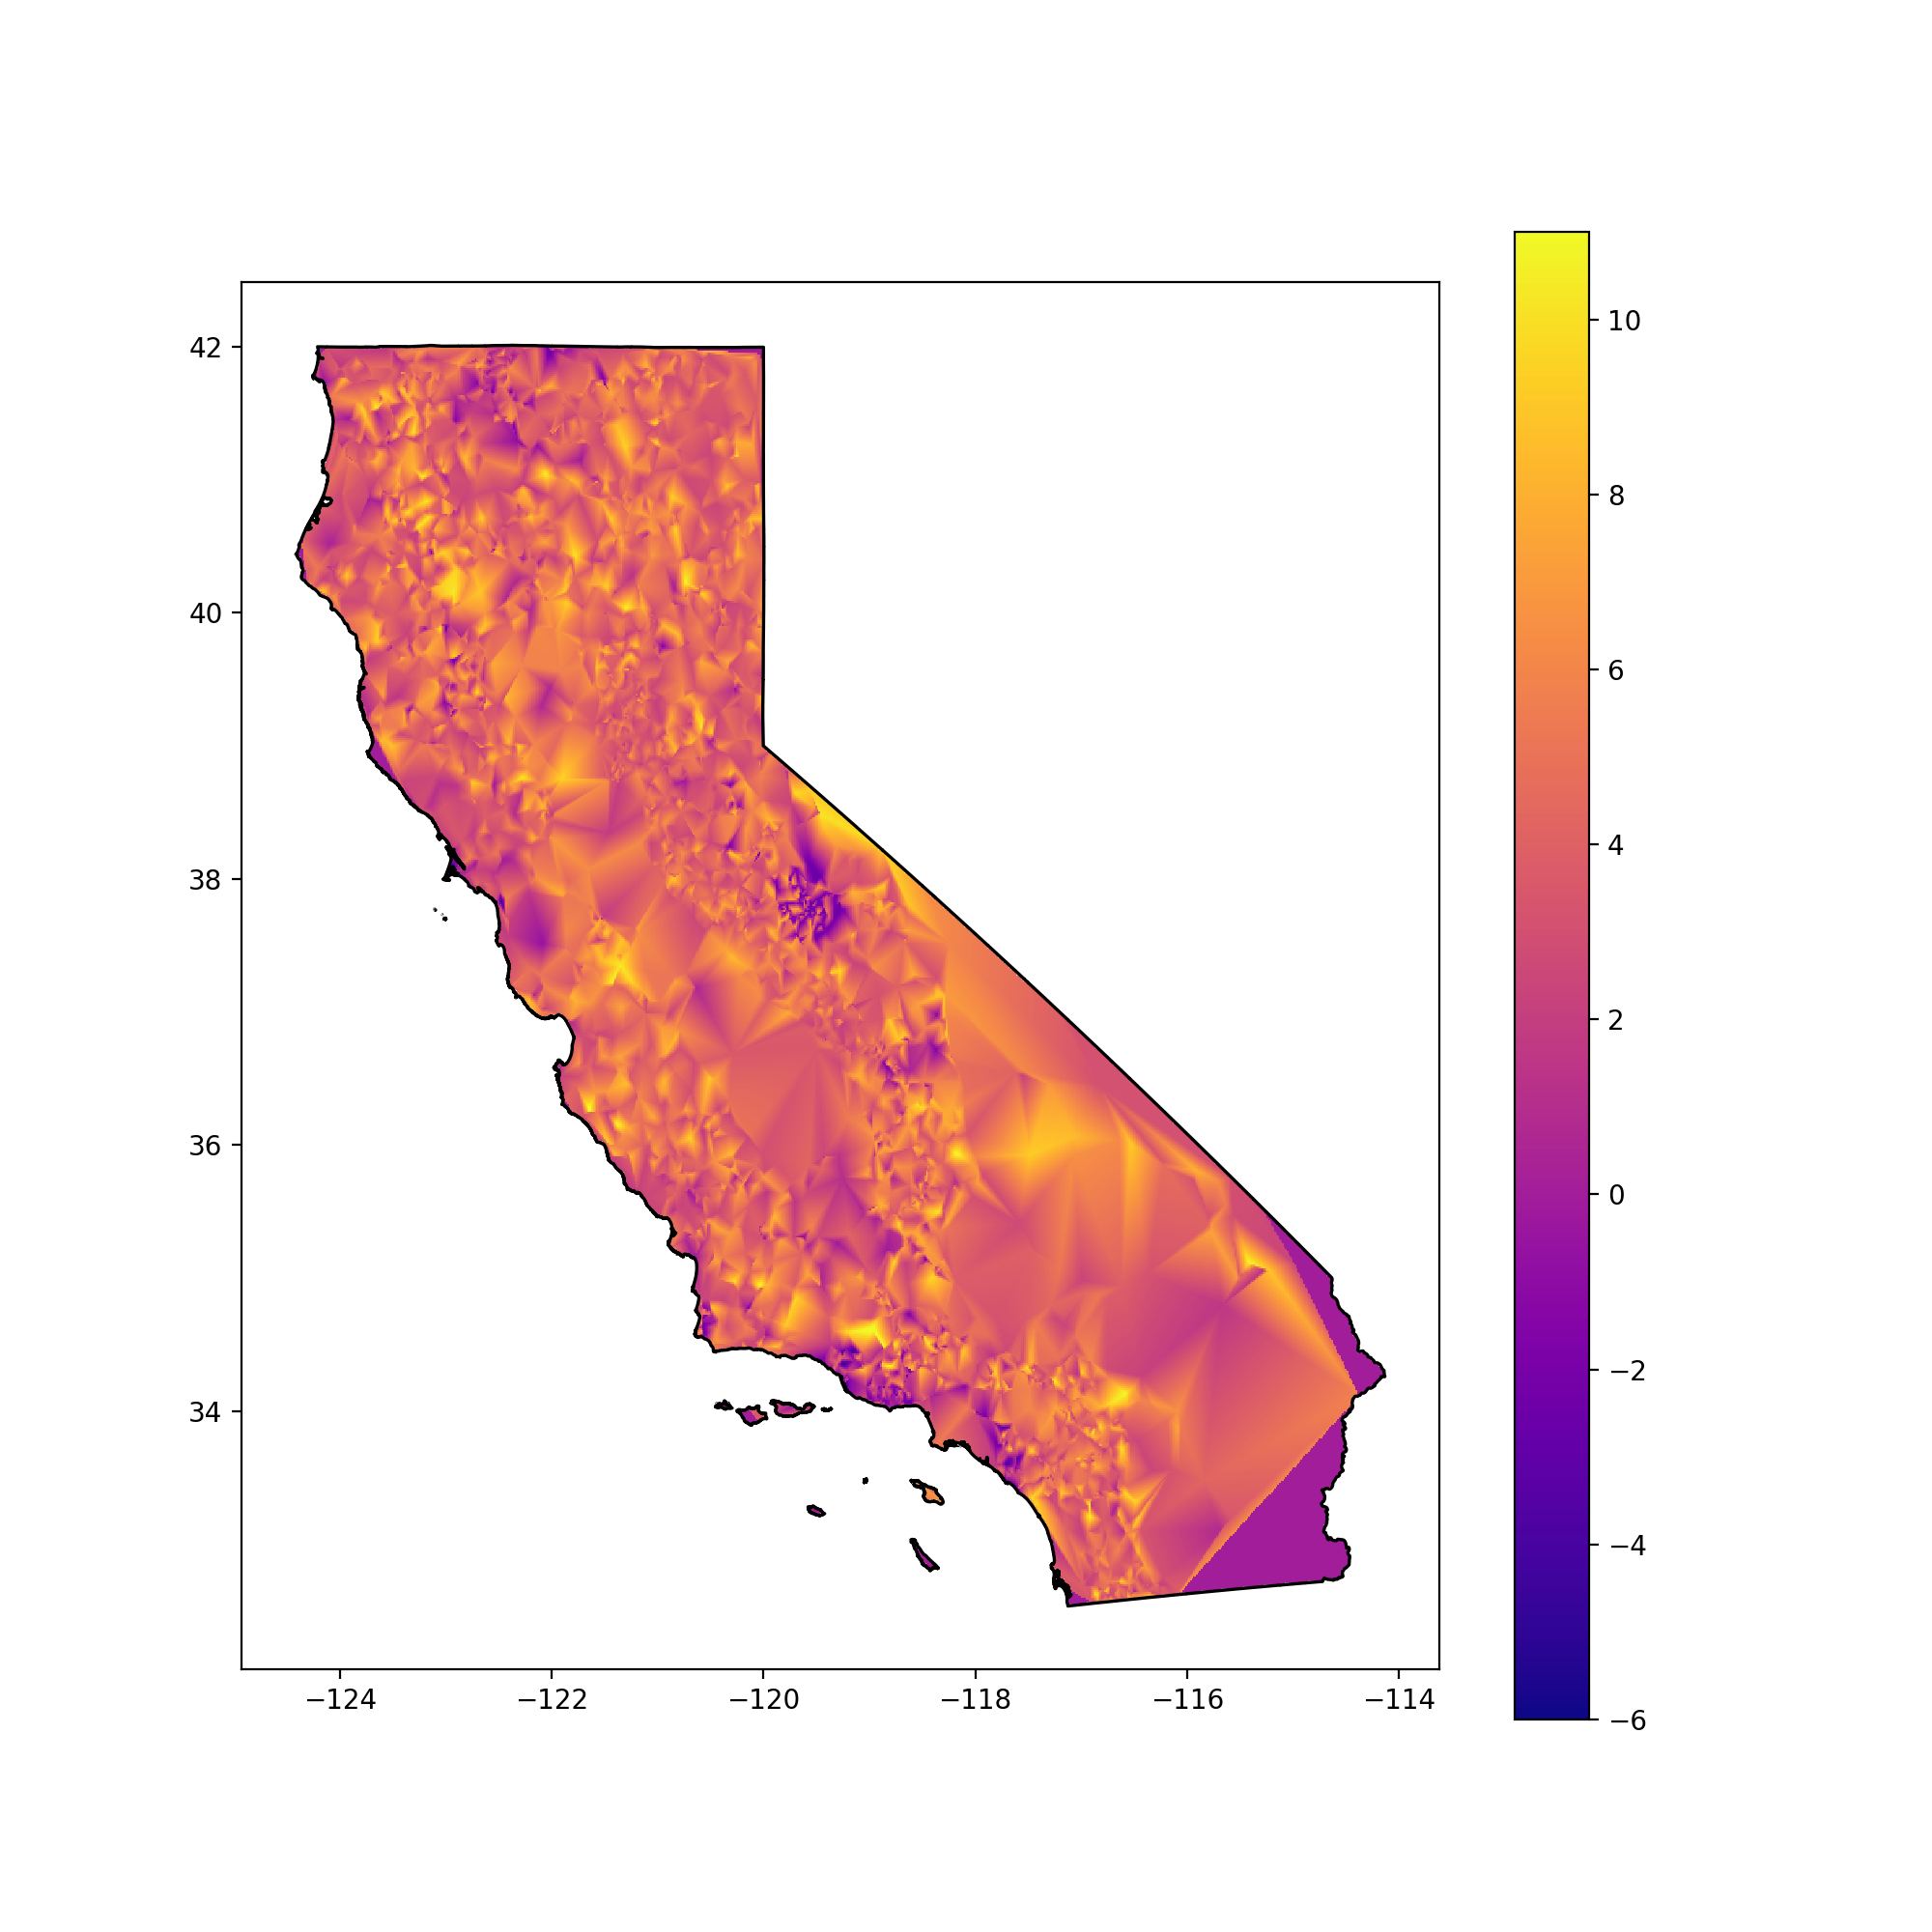

<Axes: >

In [93]:
dataframe_name = "./dataframes/2000-2019/linear_interpolation_log"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)

<IPython.core.display.Javascript object>


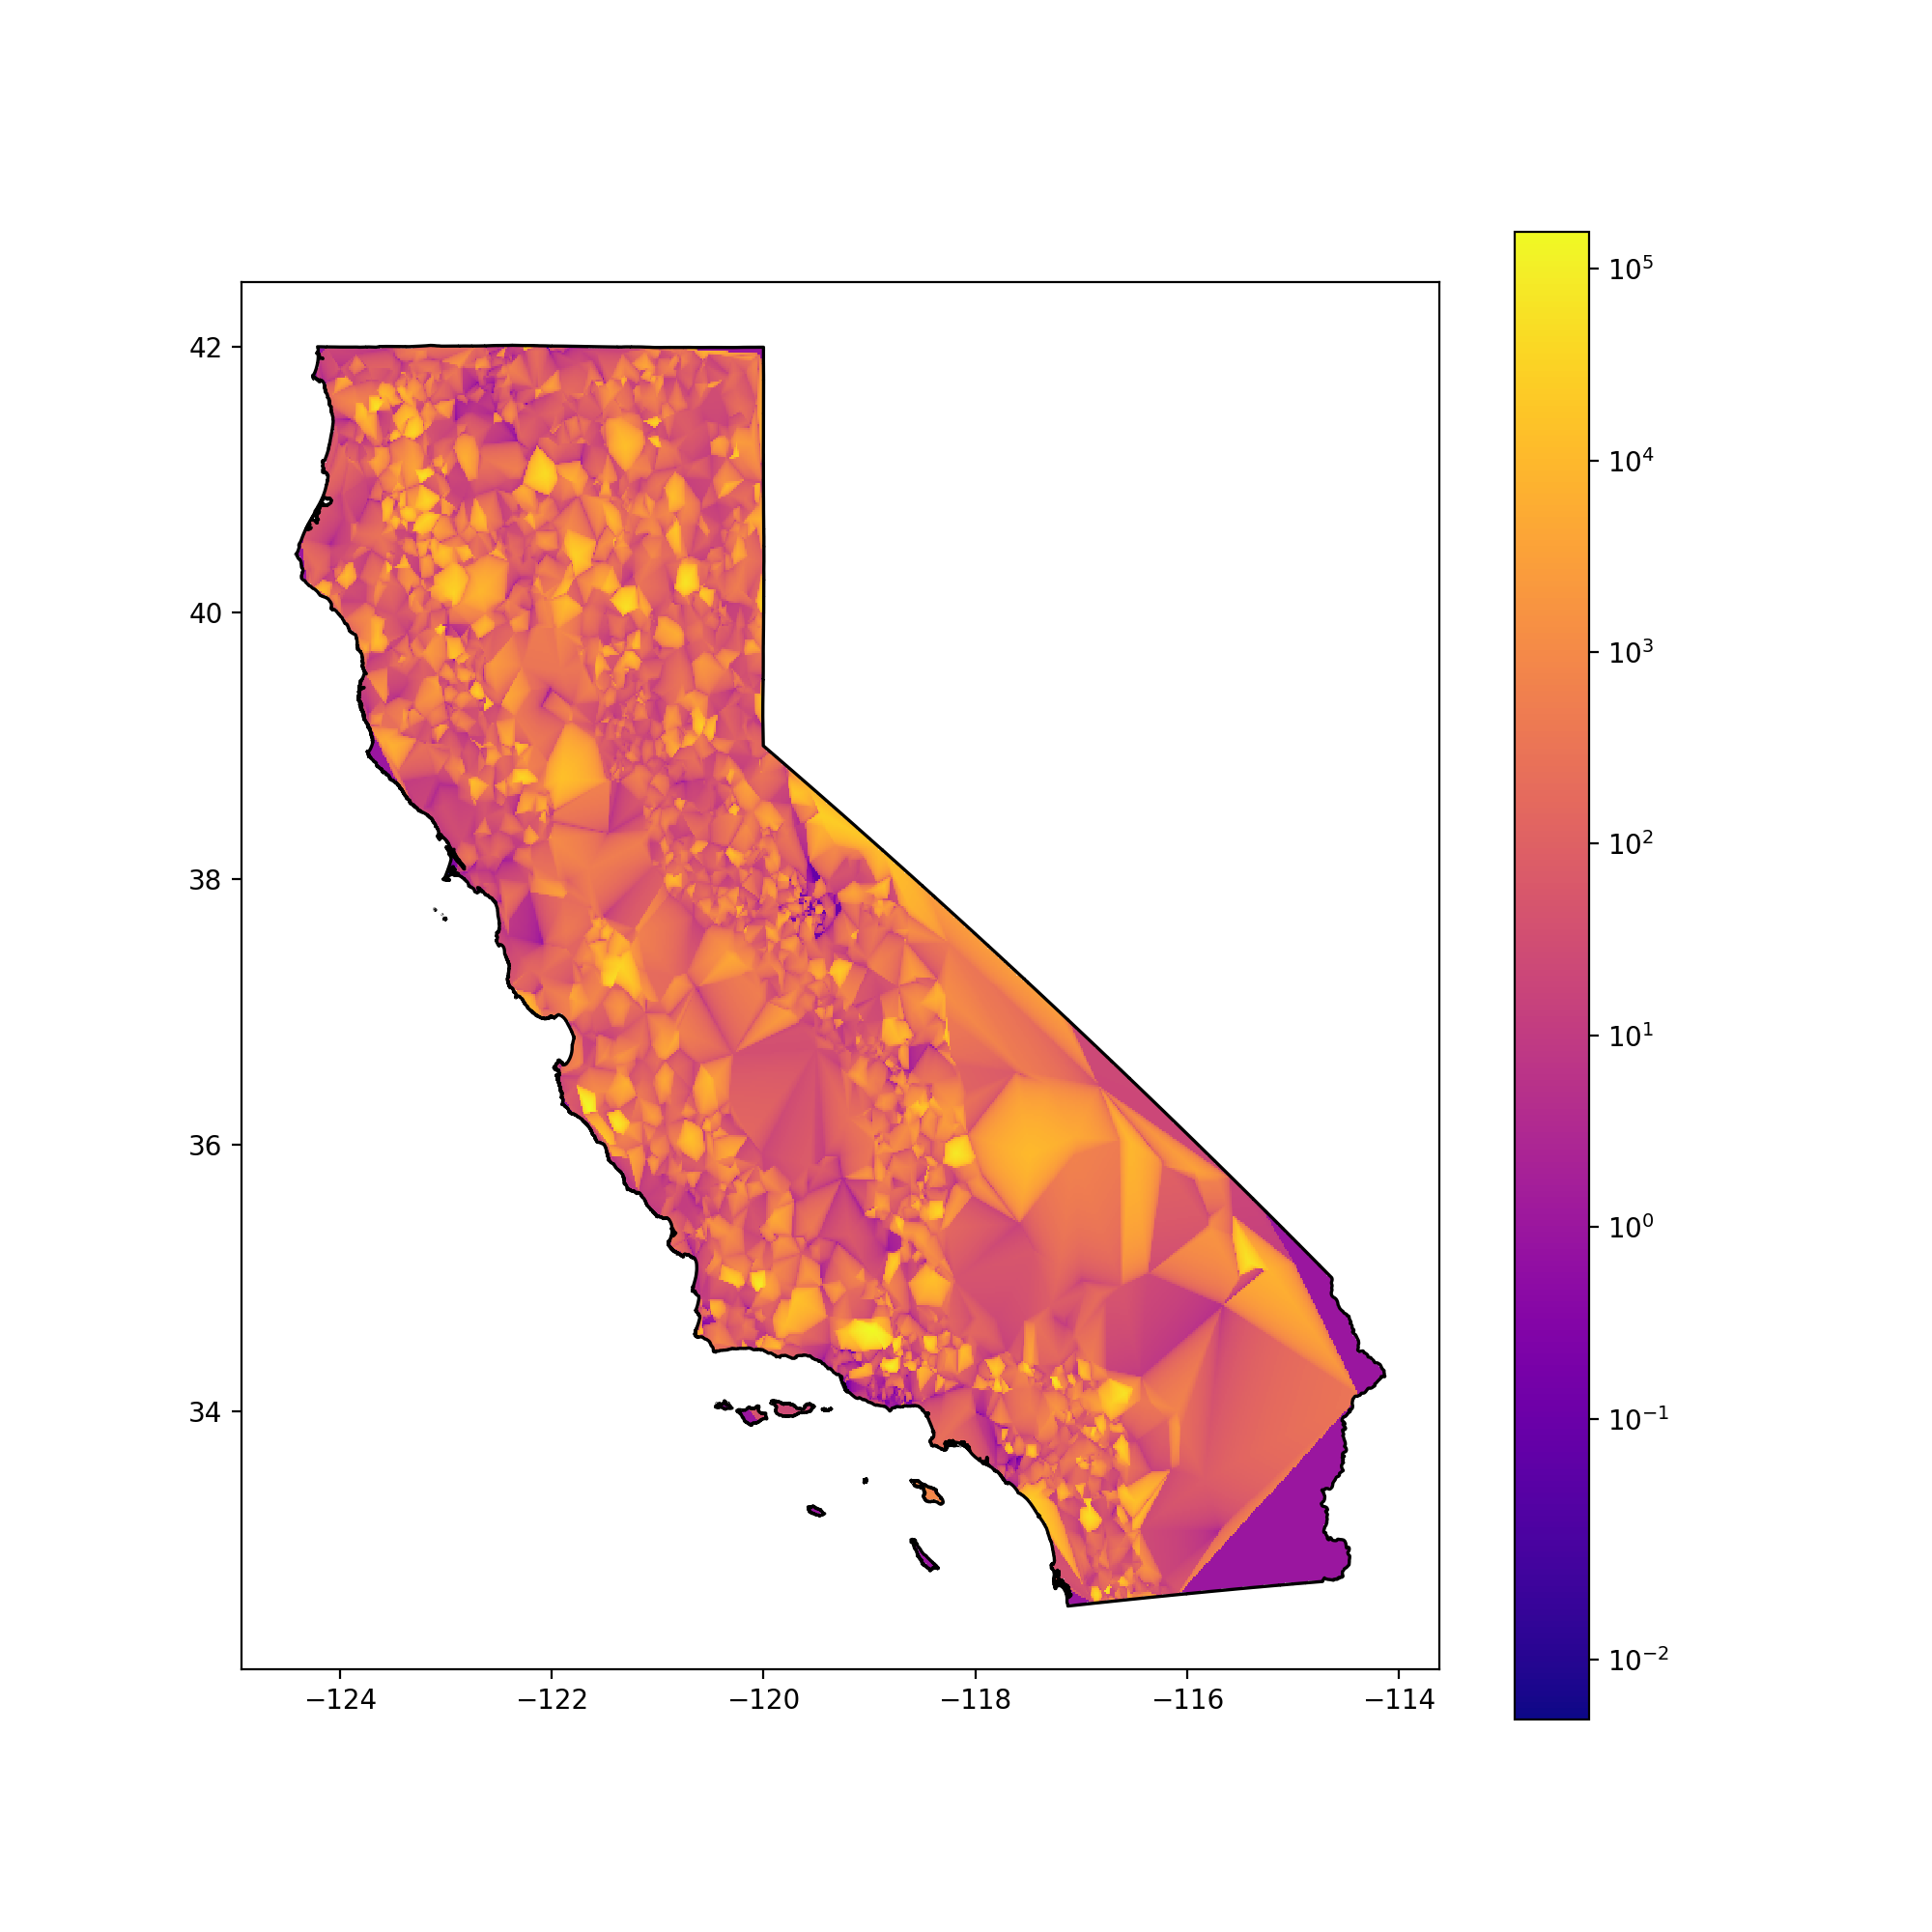

In [96]:
dataframe_name = "./dataframes/2000-2019/linear_interpolation_normal"
dataframe = pd.read_pickle(dataframe_name)
log_plotter(dataframe)

<IPython.core.display.Javascript object>


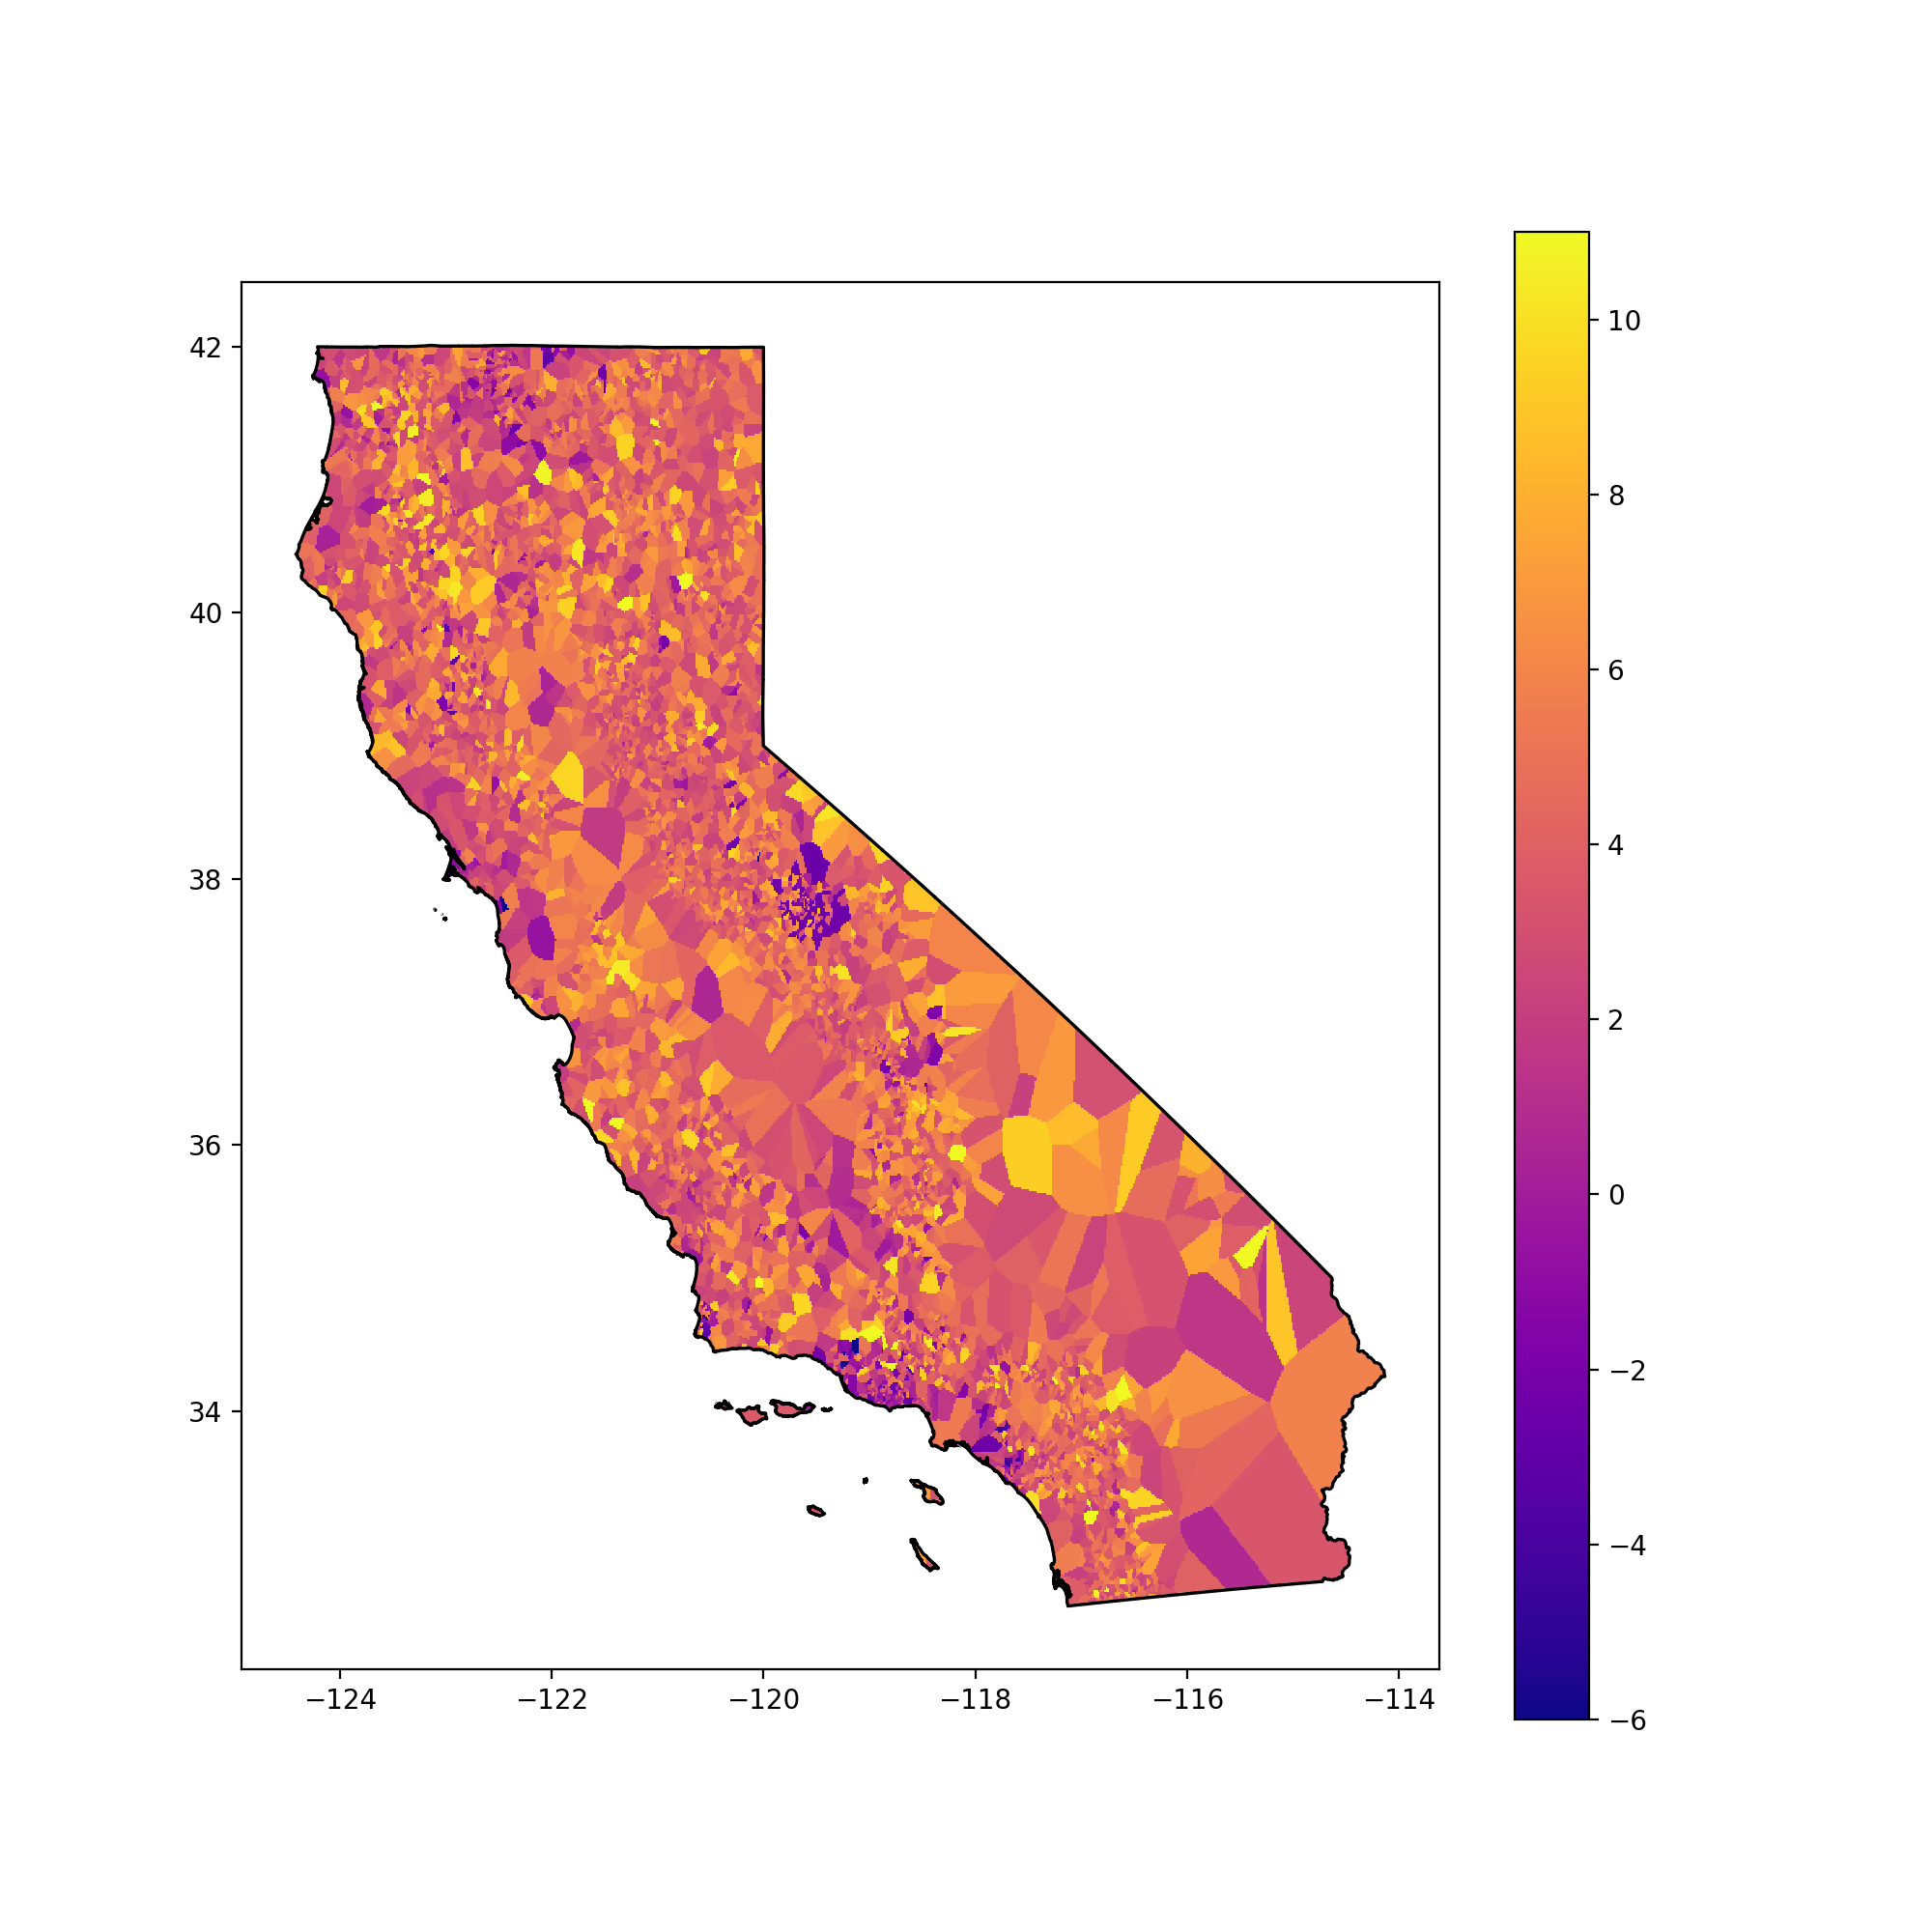

<Axes: >

In [95]:
dataframe_name = "./dataframes/2000-2019/nearest_interpolation_log"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)

<IPython.core.display.Javascript object>


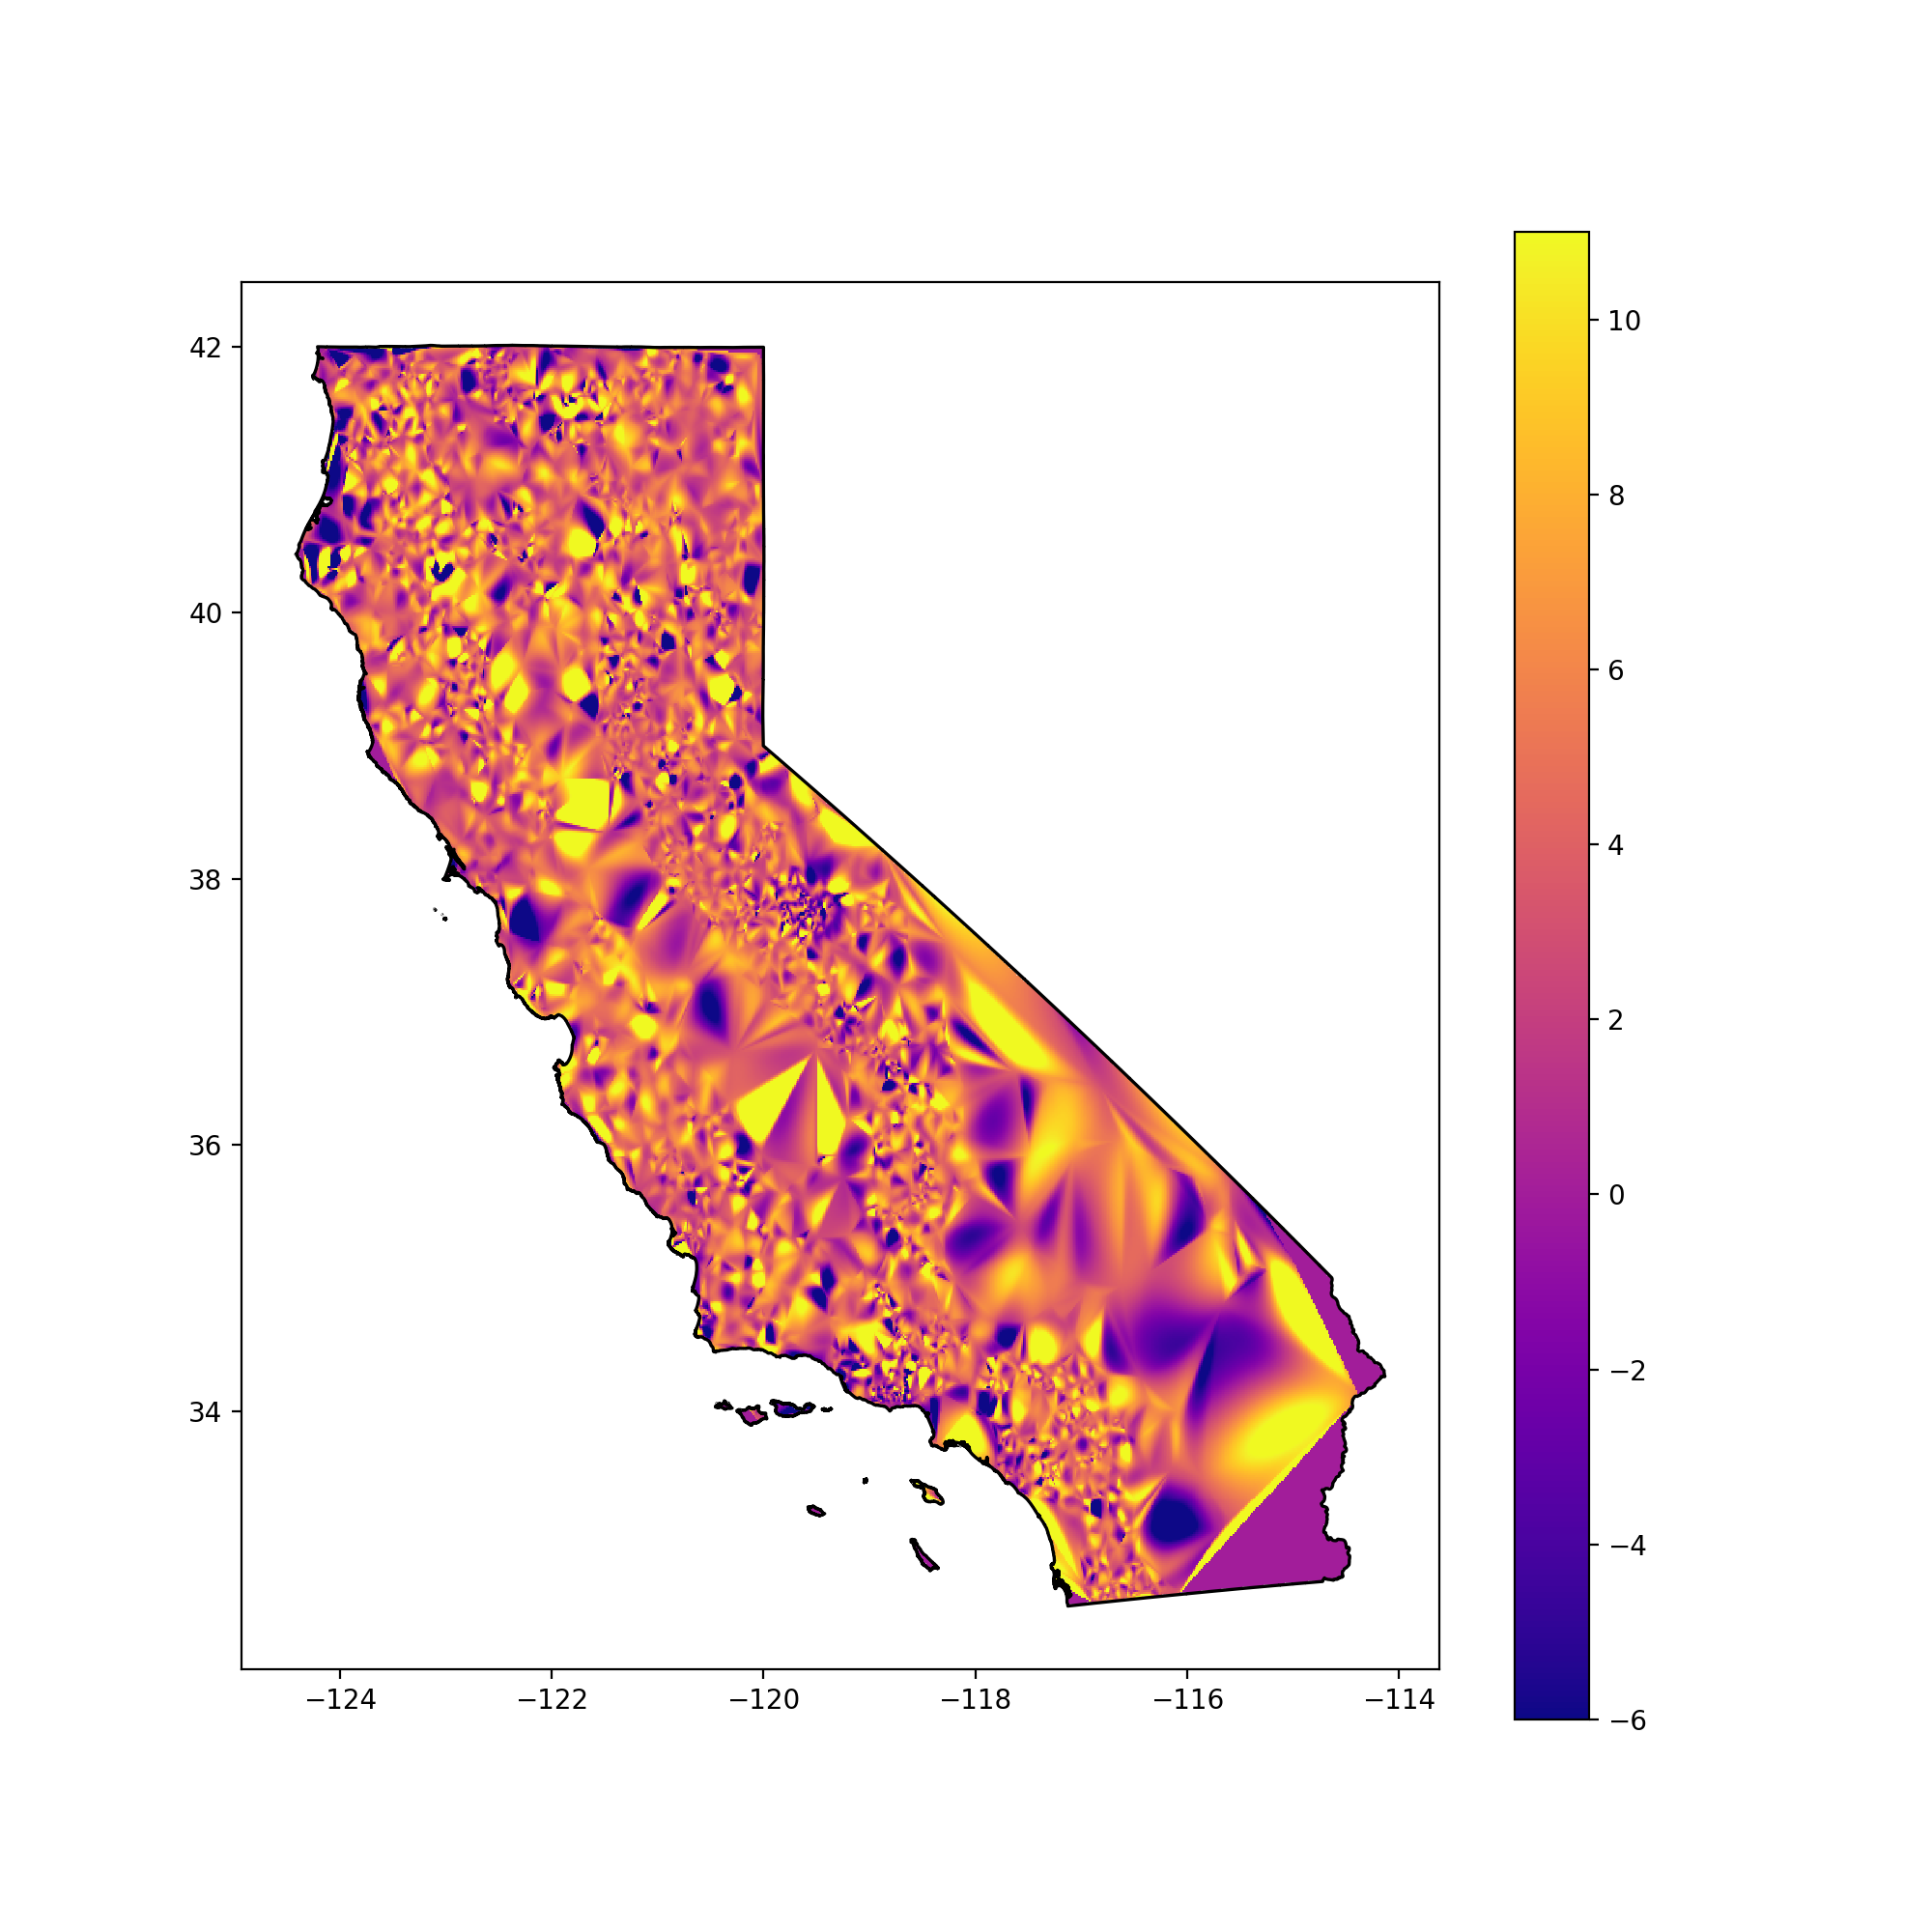

<Axes: >

In [98]:
dataframe_name = "./dataframes/2000-2019/cubic_interpolation_log"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)

<IPython.core.display.Javascript object>


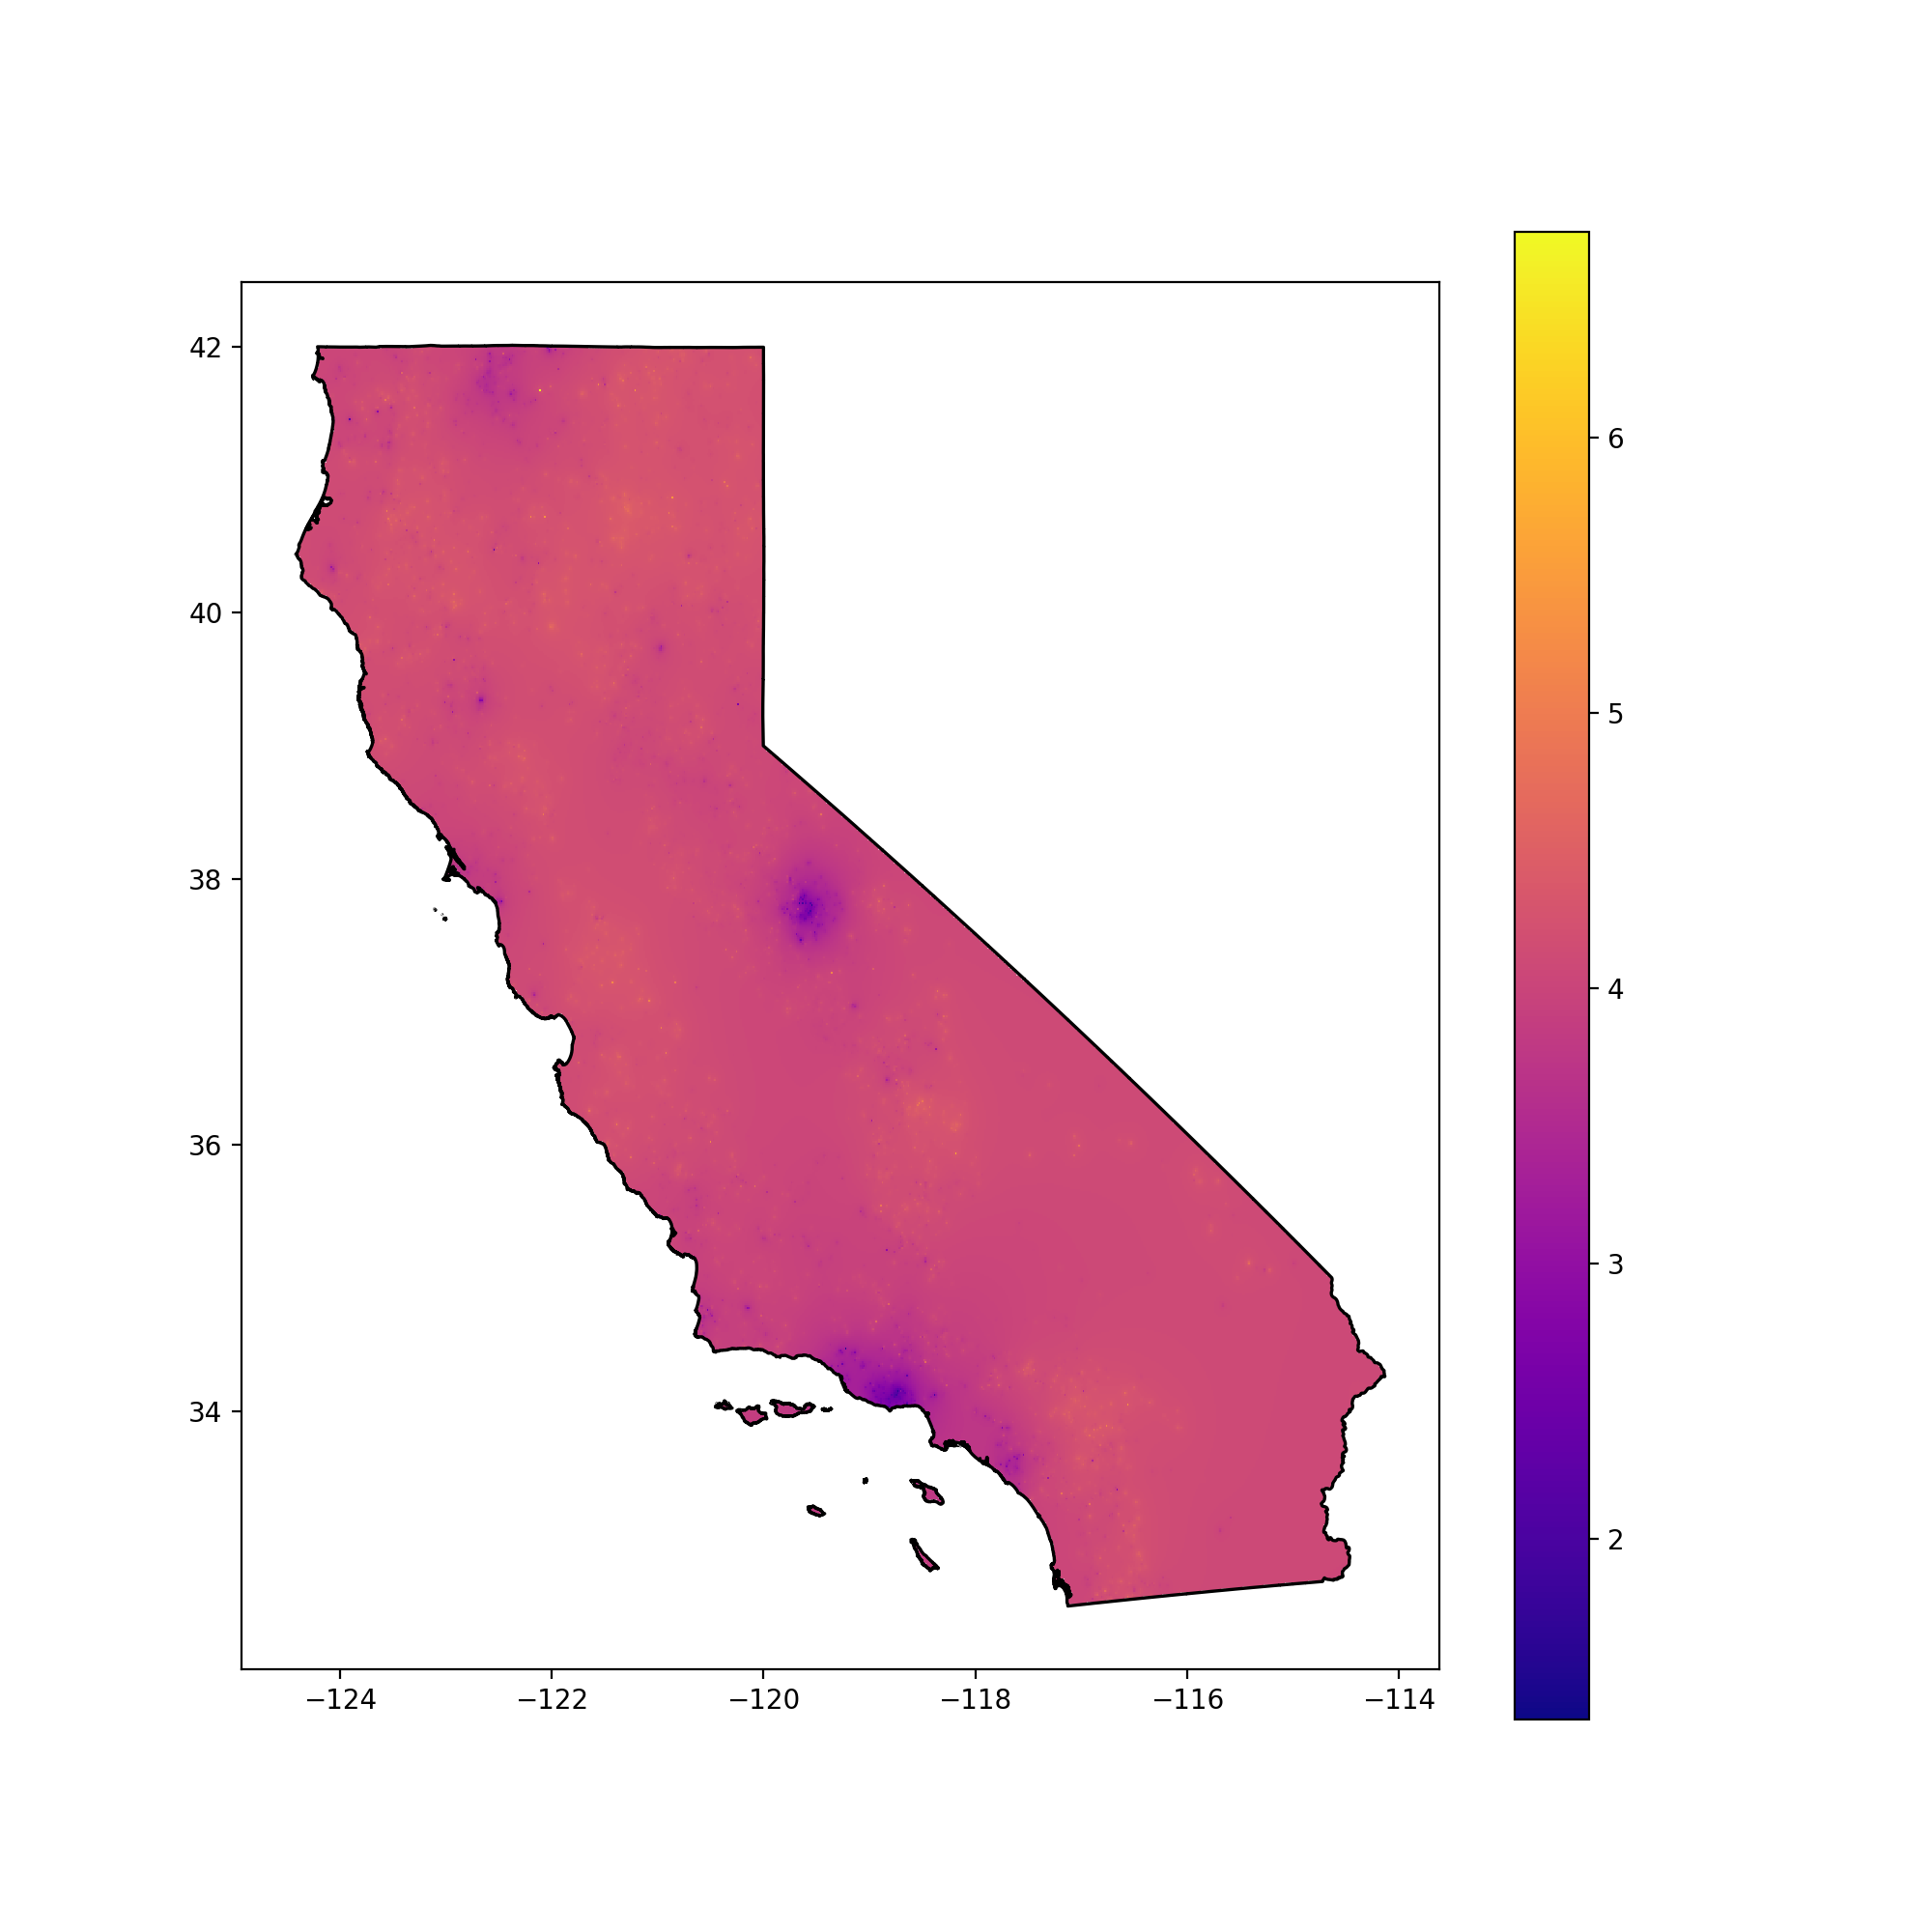

<Axes: >

In [102]:
dataframe_name = "./dataframes/2000-2019/inverse_distance_weighted_log"
dataframe = pd.read_pickle(dataframe_name)
free_plotter(dataframe)

<IPython.core.display.Javascript object>


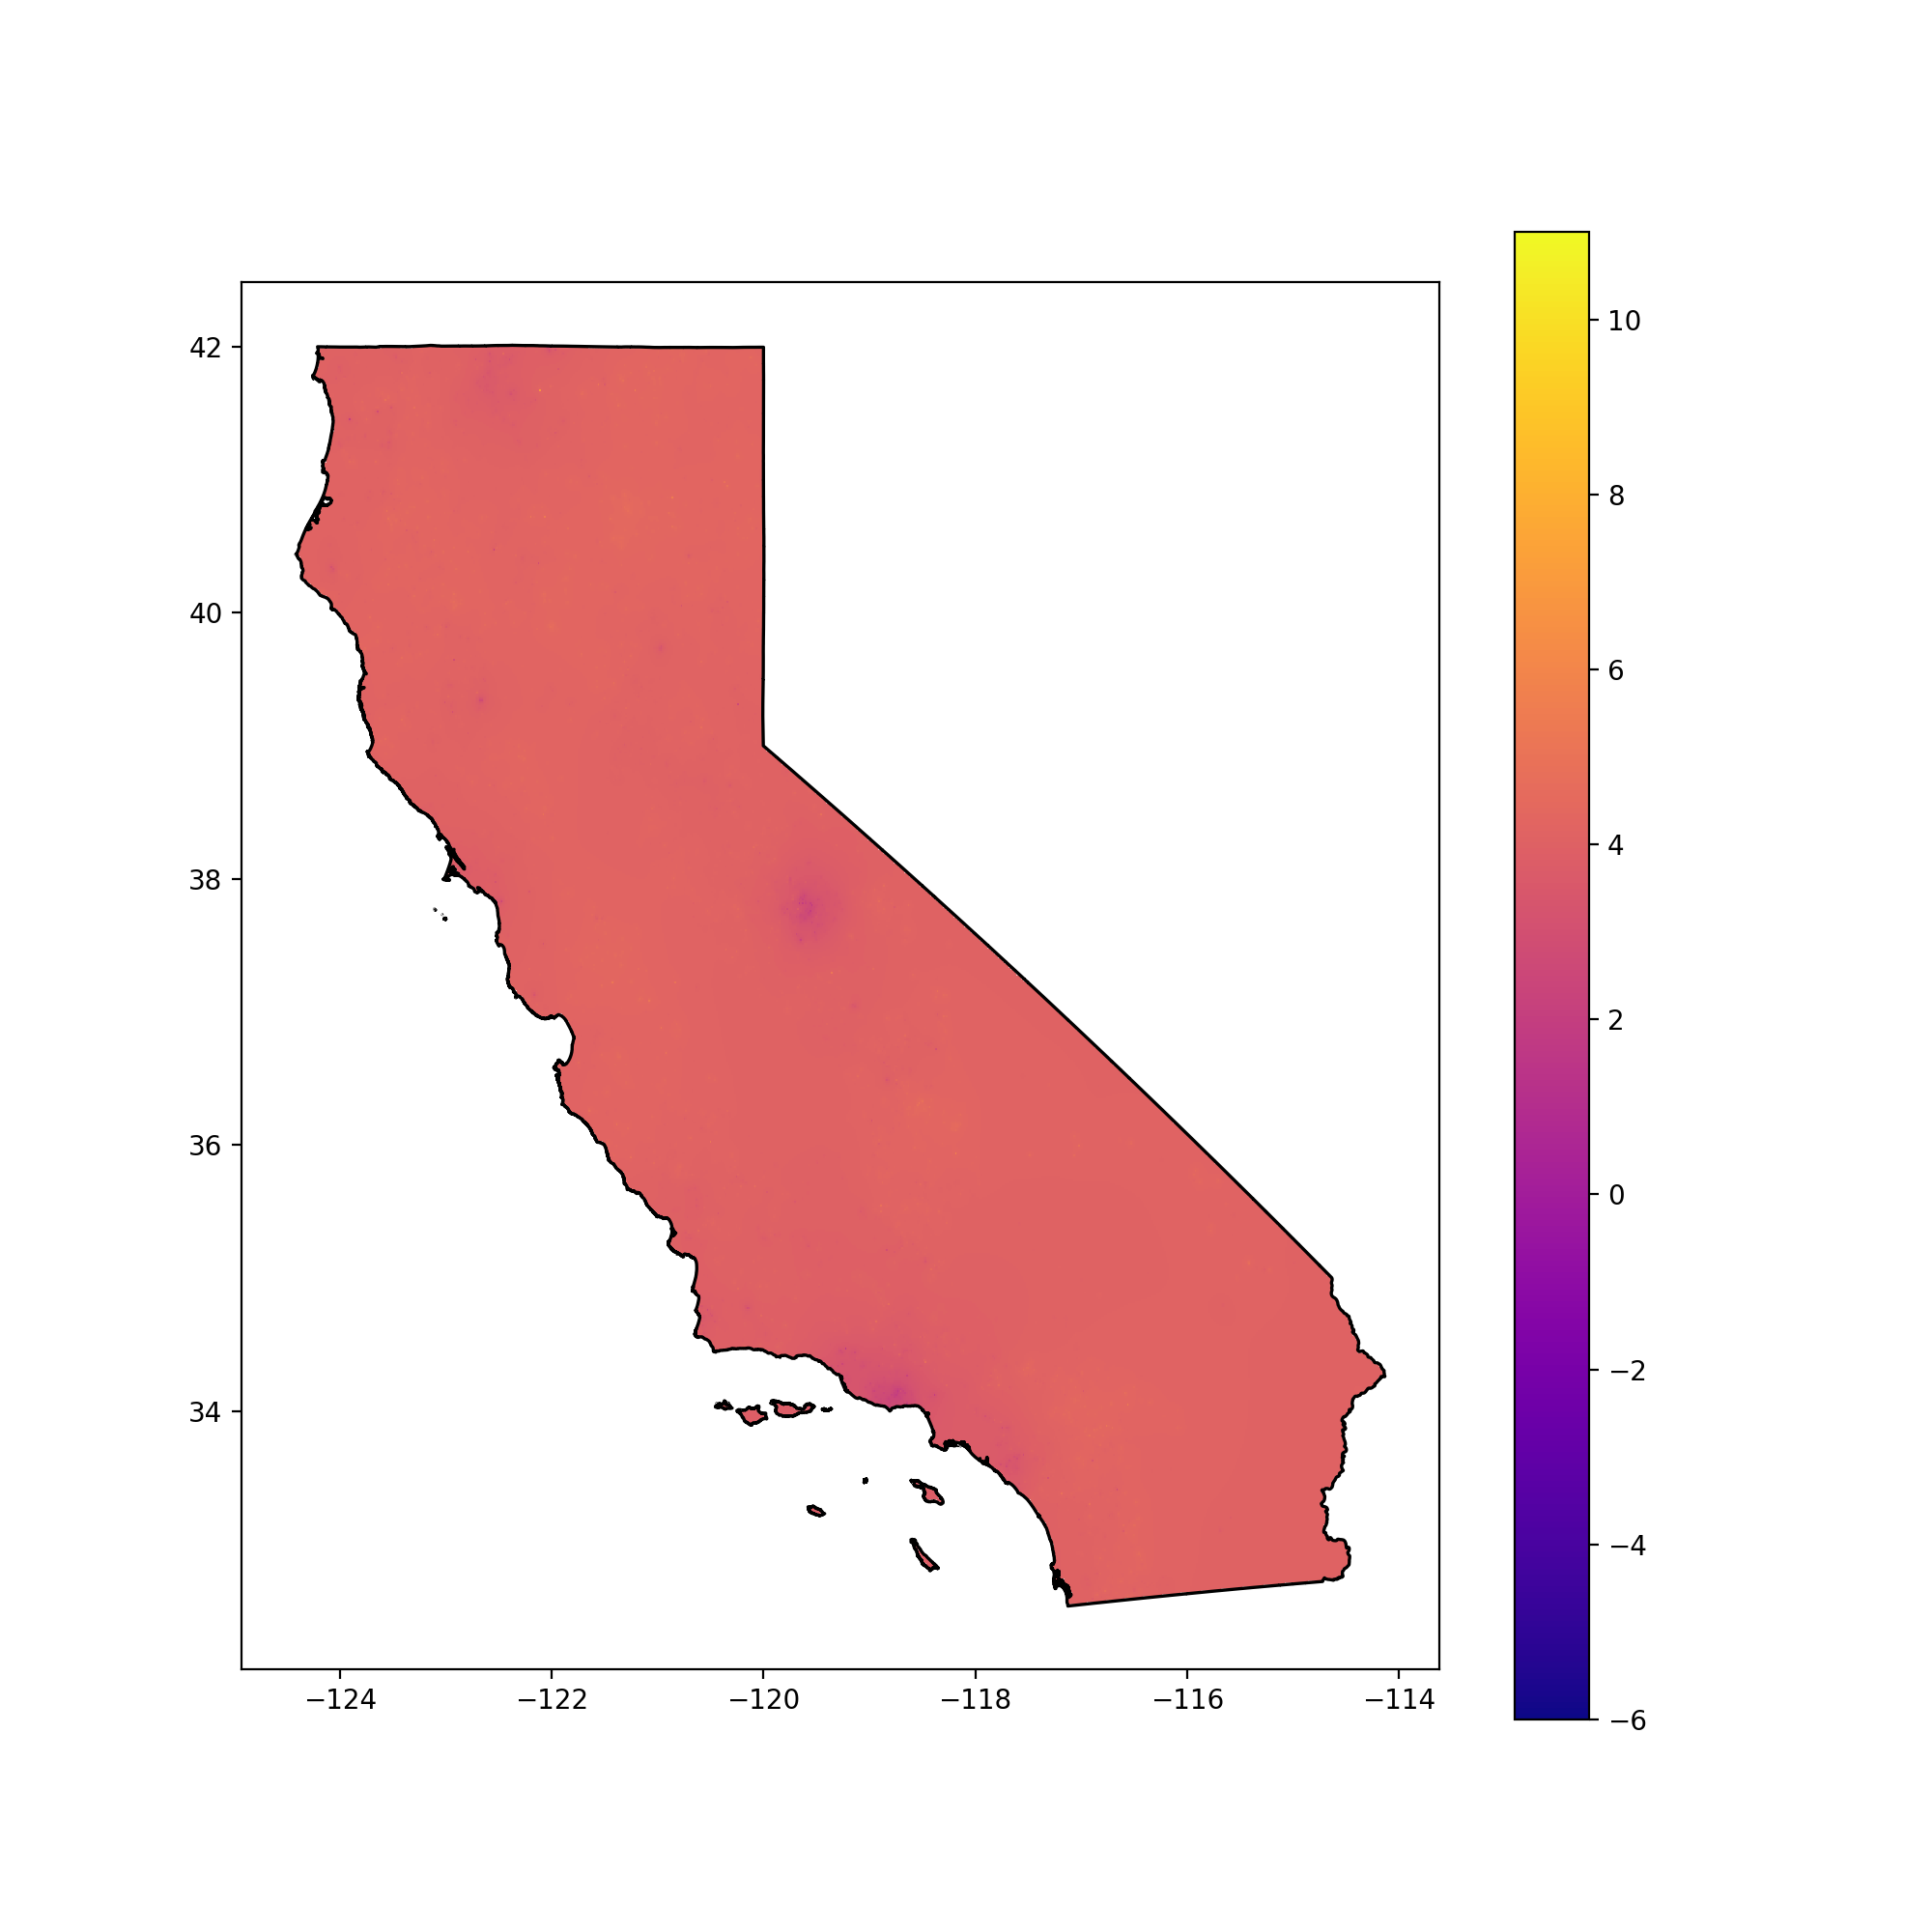

<Axes: >

In [103]:
dataframe_name = "./dataframes/2000-2019/inverse_distance_weighted_log"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)

<IPython.core.display.Javascript object>


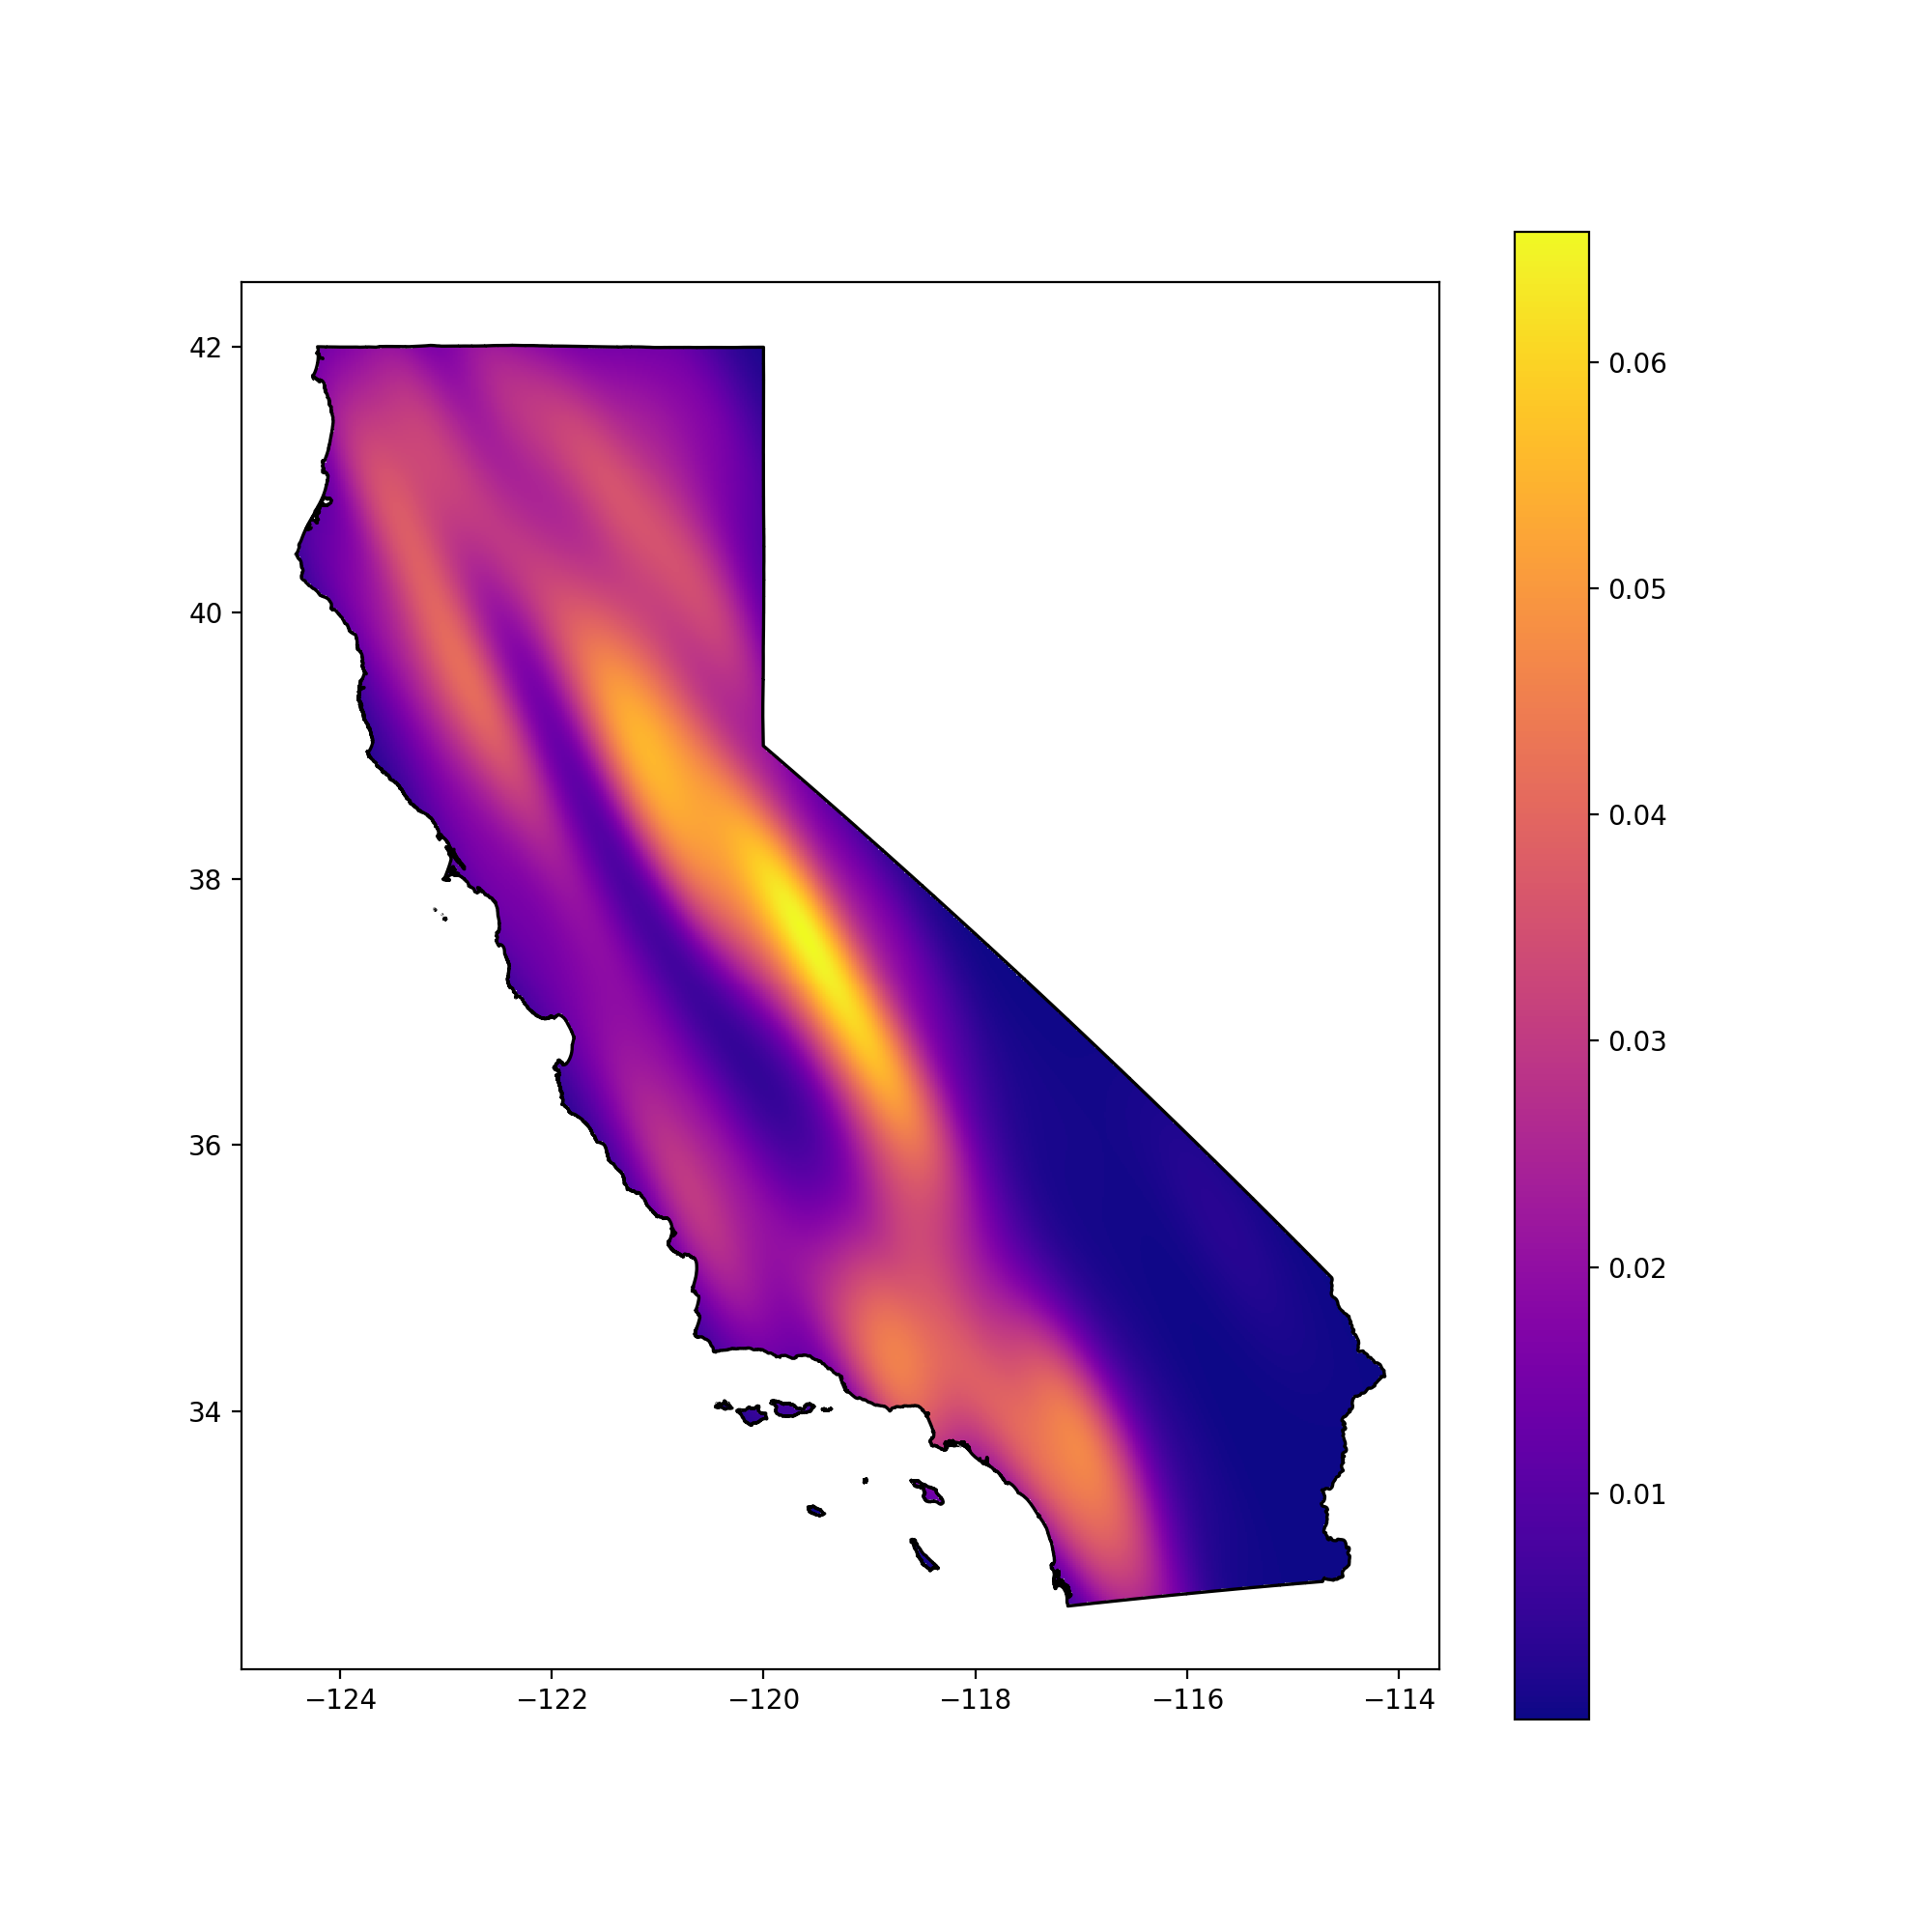

<Axes: >

In [105]:
dataframe_name = "./dataframes/2000-2019/gaussian_kde"
dataframe = pd.read_pickle(dataframe_name)
free_plotter(dataframe)

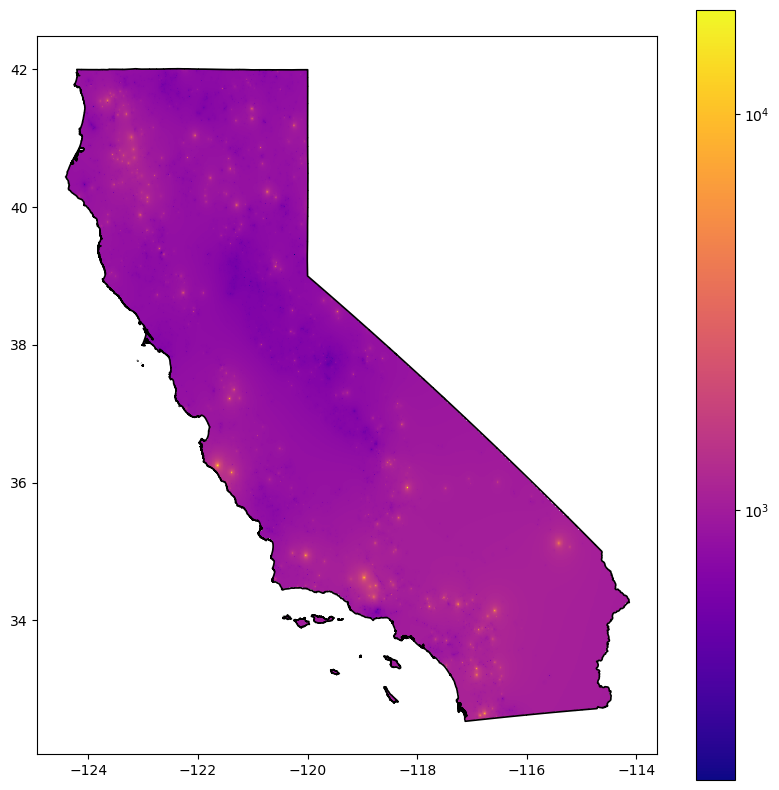

In [8]:
dataframe_name = "./dataframes/2000-2019/inverse_distance_weighted_normal"
dataframe = pd.read_pickle(dataframe_name)
log_plotter(dataframe)

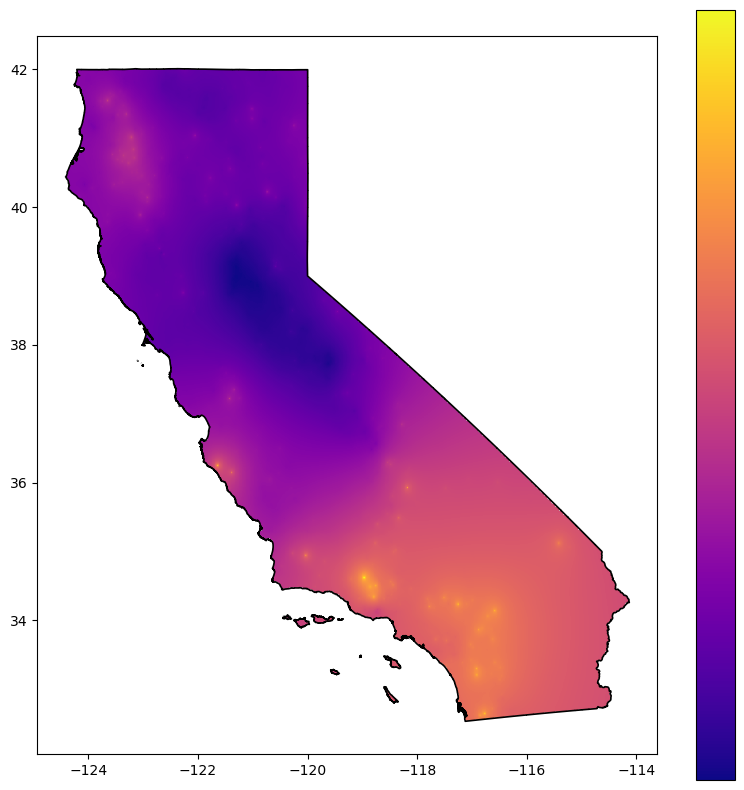

In [9]:
dataframe_name = "./dataframes/2000-2019/inverse_distance_weighted_power_0.2_normal"
dataframe = pd.read_pickle(dataframe_name)
log_plotter(dataframe)